<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3_01: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [1]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

import statsmodels.api as sm

%matplotlib inline

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [2]:
# Read in the citibike data in the data folder in this repository.
citibike = pd.read_csv('../data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [3]:
# Check first five rows.
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [4]:
citibike[citibike['birth year']=="\\n"]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender


In [5]:
def conv_float(string):
    try:
        return float(string)
    except:
        return string

In [6]:
citibike['birth_yr'] = citibike['birth year'].apply(conv_float)

In [7]:
citibike[citibike['birth_yr'] == "\n"]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,birth_yr


In [8]:
citibike['birth_yr']

0         1991.0
1         1979.0
2         1948.0
3         1981.0
4         1990.0
           ...  
224731    1976.0
224732    1985.0
224733    1968.0
224734    1982.0
224735    1960.0
Name: birth_yr, Length: 224736, dtype: object

In [9]:
citibike[citibike['birth_yr'] == '\\N']

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,birth_yr
31,664,2014-02-01 00:08:47,2014-02-01 00:19:51,237,E 11 St & 2 Ave,40.730473,-73.986724,349,Rivington St & Ridge St,40.718502,-73.983299,17540,Customer,\N,0,\N
55,836,2014-02-01 00:16:10,2014-02-01 00:30:06,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,16731,Customer,\N,0,\N
222,1277,2014-02-01 01:17:50,2014-02-01 01:39:07,469,Broadway & W 53 St,40.763441,-73.982681,336,Sullivan St & Washington Sq,40.730477,-73.999061,20728,Customer,\N,0,\N
266,29906,2014-02-01 01:44:59,2014-02-01 10:03:25,294,Washington Square E,40.730494,-73.995721,368,Carmine St & 6 Ave,40.730386,-74.002150,18944,Customer,\N,0,\N
293,2625,2014-02-01 01:56:32,2014-02-01 02:40:17,395,Bond St & Schermerhorn St,40.688070,-73.984106,395,Bond St & Schermerhorn St,40.688070,-73.984106,19782,Customer,\N,0,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224385,280,2014-02-28 21:42:34,2014-02-28 21:47:14,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,382,University Pl & E 14 St,40.734927,-73.992005,15529,Customer,\N,0,\N
224438,1106,2014-02-28 22:00:46,2014-02-28 22:19:12,423,W 54 St & 9 Ave,40.765849,-73.986905,385,E 55 St & 2 Ave,40.757973,-73.966033,18720,Customer,\N,0,\N
224525,864,2014-02-28 22:29:52,2014-02-28 22:44:16,385,E 55 St & 2 Ave,40.757973,-73.966033,441,E 52 St & 2 Ave,40.756014,-73.967416,21399,Customer,\N,0,\N
224536,683,2014-02-28 22:32:55,2014-02-28 22:44:18,385,E 55 St & 2 Ave,40.757973,-73.966033,441,E 52 St & 2 Ave,40.756014,-73.967416,17516,Customer,\N,0,\N


In [10]:
citibike['usertype'].value_counts()

Subscriber    218019
Customer        6717
Name: usertype, dtype: int64

In [11]:
# Check datatypes and numbers of non-null values.
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [12]:
# Summarize all variables.
citibike.describe(include='all')

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,birth_yr
count,224736.000000,224736,224736,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736,224736.000000,224736.0
unique,NaN,204437,204781,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,78,NaN,78.0
top,NaN,2014-02-11 08:50:10,2014-02-25 08:47:55,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Subscriber,1985,NaN,1985.0
freq,NaN,7,6,NaN,2920,NaN,NaN,NaN,2622,NaN,NaN,NaN,218019,9305,NaN,9305.0
mean,874.519810,NaN,NaN,439.203479,NaN,40.734366,-73.990386,440.741995,NaN,40.734221,-73.990521,18010.598222,NaN,NaN,1.154617,NaN
std,5486.092219,NaN,NaN,335.723861,NaN,0.019031,0.011853,341.497433,NaN,0.019048,0.011920,1987.769335,NaN,NaN,0.436592,NaN
min,60.000000,NaN,NaN,72.000000,NaN,40.680342,-74.017134,72.000000,NaN,40.680342,-74.017134,14529.000000,NaN,NaN,0.000000,NaN
25%,360.000000,NaN,NaN,305.000000,NaN,40.721854,-73.998522,305.000000,NaN,40.721816,-73.999061,16302.000000,NaN,NaN,1.000000,NaN
50%,544.000000,NaN,NaN,403.000000,NaN,40.736197,-73.990617,403.000000,NaN,40.735877,-73.990741,17975.000000,NaN,NaN,1.000000,NaN
75%,845.000000,NaN,NaN,490.000000,NaN,40.749156,-73.981918,488.000000,NaN,40.749013,-73.981948,19689.000000,NaN,NaN,1.000000,NaN


In [13]:
# Check for missing values. (This is easier to read 
# than the .info() output.)
citibike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
birth_yr                   0
dtype: int64

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

$$
\begin{eqnarray*}
&H_0:& \mu_1 = \mu_2 \\
&H_A:& \mu_1 \neq \mu_2
\end{eqnarray*}
$$

We will conduct this test assuming $\alpha=0.05$.

In [14]:
ttest_ind(citibike[citibike['gender'] == 1]['tripduration'],
          citibike[citibike['gender'] == 2]['tripduration'])

Ttest_indResult(statistic=-5.929304472651931, pvalue=3.046762685660303e-09)

**Answer**: Our $t$-statistic is -5.93 and our $p$-value is very, very small. Because $p$ is smaller than $\alpha$, we reject our null hypothesis and accept that $\mu_1 \neq \mu_2$. This means that we accept that the average trip duration is different for `gender=1` and `gender=2`.

## What numeric columns shouldn't be treated as numeric?

**Answer:** The `start station id`, `end station id`, and `bikeid` columns are all categorical in nature (e.g. adding two of these ID numbers together would be meaningless). These are technically integers, but should not be treated that way.

## Dummify the `start station id` Variable

In [15]:
# Before dummifying, let's see how many columns we should create.
len(set(citibike['start station id']))

329

In [16]:
# How many columns are there in the original data?
len(citibike.columns)

16

In [17]:
# Let's dummy the data.
citibike = pd.get_dummies(citibike,
                          columns=['start station id'],
                          drop_first=True)

In [18]:
# How many columns are there now?
len(citibike.columns)

343

In [19]:
# 329 unique values + 15 original columns  = 344.
# We dropped the `start station id` variable: 344 - 1 = 343.
# We set `drop_first = True`: 343 - 1 = 342.

# We got the right number of columns in our output!

# Let's check out our data to make sure it looks like we did this right.
citibike.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0


## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [20]:
# First attempt.
citibike['age'] = 2014 - citibike['birth year']

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [21]:
# We got an error! Somewhere, there's a string.

# Check the values in the birth year column.
citibike['birth year'].value_counts()

1985    9305
1984    9139
1983    8779
1981    8208
1986    8109
        ... 
1910       4
1917       3
1927       2
1921       1
1913       1
Name: birth year, Length: 78, dtype: int64

In [22]:
# Can we just pull out the strings?

# Iterate through all unique values in birth year column.
for i in set(citibike['birth year']):

    # Try typecasting each value to be an integer.
    try:
        int(i)
        
    # If it gives you an error (so it can't be
    # printed as an integer), print the value.
    except:
        print(i)

\N


In [23]:
# How many values of "\N" are there?
citibike[citibike['birth year'] == '\N'].shape[0]

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: malformed \N character escape (<ipython-input-23-d02bf09d504f>, line 2)

In [24]:
# How many values of "\N" are there?
# We got an error - it interprets \ as an escape character.
# We need to use the escape character twice!
citibike[citibike['birth year'] == '\\N'].shape[0]

6717

In [25]:
# There's 6,717 values, which is just under 3% of the rows.
# Let's replace "\N" with np.nan.

citibike.loc[citibike['birth year'] == '\\N','birth year'] = np.nan

In [26]:
# Did we successfully do this?
citibike.isnull().sum()

tripduration              0
starttime                 0
stoptime                  0
start station name        0
start station latitude    0
                         ..
start station id_2017     0
start station id_2021     0
start station id_2022     0
start station id_2023     0
start station id_3002     0
Length: 343, dtype: int64

In [27]:
# Now let's try creating our age column.
citibike['age'] = citibike['birth year'].map(lambda x: 2014 - int(x),
                                             na_action = 'ignore')

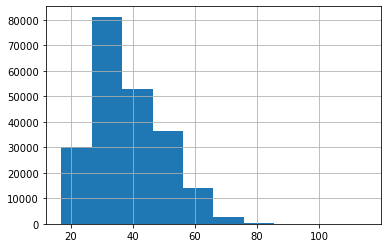

In [28]:
# Let's check to see if age and birth year seem to match up.
citibike['age'].hist();

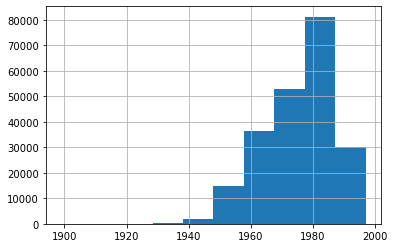

In [29]:
citibike['birth year'].dropna().astype(int).hist();
# Yes, birth year is a mirror image of age.

## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [47]:
citibike

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,23.0,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,35.0,1
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,66.0,1
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,33.0,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224731,848,2014-02-28 23:57:13,2014-03-01 00:11:21,Broadway & W 32 St,40.748549,-73.988084,432,E 7 St & Avenue A,40.726218,-73.983799,...,0,0,0,0,0,0,0,0,38.0,1
224732,1355,2014-02-28 23:57:55,2014-03-01 00:20:30,W 20 St & 8 Ave,40.743453,-74.000040,302,Avenue D & E 3 St,40.720828,-73.977932,...,0,0,0,0,0,0,0,0,29.0,1
224733,304,2014-02-28 23:58:17,2014-03-01 00:03:21,E 17 St & Broadway,40.737050,-73.990093,334,W 20 St & 7 Ave,40.742388,-73.997262,...,0,0,0,0,0,0,0,0,46.0,1
224734,308,2014-02-28 23:59:10,2014-03-01 00:04:18,S Portland Ave & Hanson Pl,40.685396,-73.974315,365,Fulton St & Grand Ave,40.682232,-73.961458,...,0,0,0,0,0,0,0,0,32.0,1


In [48]:
# Because usertype is a column of strings, we must
# dummy that column as well.
citibike = pd.get_dummies(citibike,
                          columns=['usertype'],
                          drop_first=True)

KeyError: "None of [Index(['usertype'], dtype='object')] are in the [columns]"

In [49]:
X_train, X_test, y_train, y_test = train_test_split(citibike.dropna().drop(columns=['tripduration', 'birth year', 'bikeid',
                                                                           'end station longitude', 'end station latitude',
                                                                           'end station name', 'end station id',
                                                                           'start station longitude', 'start station latitude',
                                                                           'start station name', 'starttime', 'stoptime']),
                                                    citibike.dropna()['tripduration'],
                                                    test_size=0.2,
                                                    random_state=123)

In [50]:
X_train.head()

,gender,birth_yr,start station id_79,start station id_82,start station id_83,start station id_116,start station id_119,start station id_120,start station id_127,start station id_128,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
147618,2,1979.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35.0,1
43852,1,1965.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49.0,1
21811,1,1987.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27.0,1
142383,1,1985.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.0,1
50231,1,1985.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.0,1


In [34]:
X_train.head()

,gender,birth_yr,start station id_79,start station id_82,start station id_83,start station id_116,start station id_119,start station id_120,start station id_127,start station id_128,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
147618,2,1979.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35.0,1
43852,1,1965.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49.0,1
21811,1,1987.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27.0,1
142383,1,1985.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.0,1
50231,1,1985.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.0,1


In [35]:
X_test.shape

(43604, 332)

**Answer**: The more data we train on, the better it will usually perform! I used `test_size = 0.2` because we have lots of data. This leaves a lot of data (about 43,600 rows!) in our test set to still evaluate our model.

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [36]:
# Step 1. Instantiate the model.
model = LinearRegression()

# Step 2. Fit the model on the training data.
model.fit(X_train, y_train)

# Step 3. Generate predictions.
preds = model.predict(X_test)

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [37]:
# Check the MSE on the training and testing sets.

print(f'MSE on testing set: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE on training set: {mean_squared_error(y_test, preds)}')

MSE on testing set: 33236347.043379296
MSE on training set: 16854621.569993578


In [38]:
# Check the R^2 on the training and testing sets.

print(f'R^2 on testing set: {r2_score(y_train, model.predict(X_train))}')
print(f'R^2 on training set: {r2_score(y_test, preds)}')

R^2 on testing set: 0.003730617639141398
R^2 on training set: -0.0047963230428023085


**Answer**:  Based on the MSE, our model is performing far worse on the testing set than on the training set, which means that our model is likely overfit to the data.

Based on the $R^2$, our model is explaining approximately zero variance in the $Y$ data. Our model is probably quite bad.

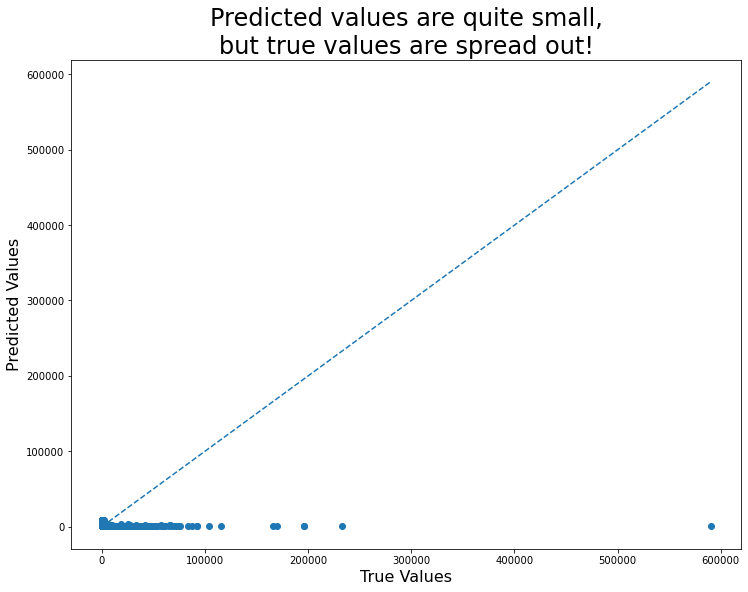

In [39]:
plt.figure(figsize = (12, 9))

# Examine the relationship between observed and predicted values.
plt.scatter(y_test, preds)

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(preds))],
         [0, max(max(y_test),max(preds))],
         linestyle = '--')

plt.title('Predicted values are quite small,\nbut true values are spread out!', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

In [40]:
print(f'MSE of baseline model: {mean_squared_error(y_test, [np.mean(y_train)] * len(y_test))}')

MSE of baseline model: 16778197.42995127


In [41]:
print(f'R^2 of baseline model: {r2_score(y_test, [np.mean(y_train)] * len(y_test))}')

R^2 of baseline model: -0.00024026139601152074


**Answer**:  Based on the above information, I conclude that my model is both overfit to the data and a bad model.
- Our MSE and $R^2$ comparing our observed `y_test` values to the average `y_train` value are better than the MSE and $R^2$ on the more complex model we've fit on the training dataset!
- I might try removing features to improve the fit of the model.

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [44]:
# Remember, we need to add a constant in statsmodels!
X_train = sm.add_constant(X_train)

In [45]:
model_sm = sm.OLS(y_train, X_train).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [131]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.03
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           3.86e-09
Time:                        21:24:04   Log-Likelihood:            -1.7581e+06
No. Observations:              174415   AIC:                         3.516e+06
Df Residuals:                  174411   BIC:                         3.516e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
start station id        0.0446      0.041      1.079      0.280      -0.036       0.126
gender                182.0063     35.241      5.165      0.000     112.935     251.077
age                     4.8292      1.211      3.988      0.000       2.456       7.203
usertype_Subscriber   438.2469     67.945      6.450      0.000     305.075     571.418
==============================================================================
Omnibus:                   587346.769   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     191207104667.895
Skew:                          60.842   Prob(JB):                         0.00
Kurtosis:                    5130.946   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$
\begin{eqnarray*}
&H_0:& \beta_{age} = 0 \\
&H_A:& \beta_{age} \neq 0
\end{eqnarray*}
$$

We will conduct this test assuming $\alpha=0.05$.

**Answer**: The $p$-value for `age` (found in the `model_sm.summary()` table) is less than 0.001, which means that $p < \alpha$ and we will reject $H_0$. This means we accept our alternative hypothesis, $H_A$, and accept that `age` is a significant predictor of `tripduration`.

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

**Answer:** Based on the two hypothesis tests we've run, `age` and `gender` are significant predictors of `tripduration`. If we look at the coefficients for `age` and `gender`, both coefficients are positive, indicating that as `age` and `gender` increase, `tripduration` increases. Based on this alone, we should market toward individuals of older age who identify as `gender=2`. (We should consult a data dictionary to figure out what `2` means, but there isn't one here!)

However, our model performance is quite bad! Our predicted values aren't close to our observed values, and our $R^2$ values are terrible. We may want to iterate on our model and try to improve it before using it to make any serious decisions.